In [1]:
include("../comum.jl")
include("../modelos.jl")
using Evolutionary, Plots;
pyplot();

In [2]:
Ts     = 0.05 # Intervalo entre leituras da saída
tend   = 2.0  # tempo final para estabilização
t0     = 0.0  # instante inicial

popul  = 20   # população
iterac = 15   #iterações
α = 10.       #parâmetro para o erro
β = 0.01      #parâmetro para o jerk
γ = 0.1       #parâmetro para o torque
per = 1/2     #inicio da leitura do vetor a parti de per do comprimento total

x1, v1, a1, j1 = minimumjerkf(0.0, 0.0, 0.0,0.0, 0.6, 0.0, 0.0, tend)
x2, v2, a2, j2 = minimumjerkf(0.0, 0.0, 0.0,0.0, 0.8, 0.0, 0.0, tend)
xr = [x1,x2]
vr = [v1,v2];

In [3]:
kp_pid = SMatrix{2,2}(diagm([2800., 80.]))
kv_pid = SMatrix{2,2}(diagm([315., 15.]))
x_pid, v_pid, t_pid, a_pid, ta_pid, j_pid, tj_pid, τ_pid, t_tau_pid = robot2dof(kp_pid, kv_pid, Ts, t0, tend, xr, vr)

(Any[[0.0, -0.00323528, -0.00516597, -0.00523266, -0.00340339, 0.000405015, 0.00628882, 0.014333, 0.024589, 0.0370696  …  0.54469, 0.557405, 0.567943, 0.576352, 0.582734, 0.58725, 0.590124, 0.591651, 0.592195, 0.592196], [0.0, -0.00110978, -0.00221802, -0.00165738, 0.000969165, 0.0059927, 0.013665, 0.0241542, 0.0375789, 0.0540017  …  0.73552, 0.75278, 0.767102, 0.778541, 0.787227, 0.793372, 0.797269, 0.799307, 0.799968, 0.799841]], Any[[0.0, -0.0574484, -0.019857, 0.0173027, 0.0558001, 0.0966112, 0.139487, 0.183083, 0.226953, 0.271148  …  0.275466, 0.23194, 0.188886, 0.147313, 0.108335, 0.073167, 0.0431201, 0.0195838, 0.00398943, -0.00195987], [0.0, -0.0355204, -0.00725265, 0.0310495, 0.0765533, 0.126243, 0.179354, 0.238065, 0.300142, 0.361011  …  0.377264, 0.31791, 0.258729, 0.201355, 0.147463, 0.0987723, 0.057075, 0.0242994, 0.00265349, -0.00630388]], [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0], Any[[-1.14897, 0.75

In [6]:
xout=map(x->xr[1](x), t_pid)

41-element Array{Float64,1}:
 0.0        
 9.02695e-5 
 0.000694875
 0.00225503 
 0.005136   
 0.00963135 
 0.0159671  
 0.0243061  
 0.034752   
 0.0473537  
 0.0621094  
 0.0789709  
 0.097848   
 ⋮          
 0.521029   
 0.537891   
 0.552646   
 0.565248   
 0.575694   
 0.584033   
 0.590369   
 0.594864   
 0.597745   
 0.599305   
 0.59991    
 0.6        

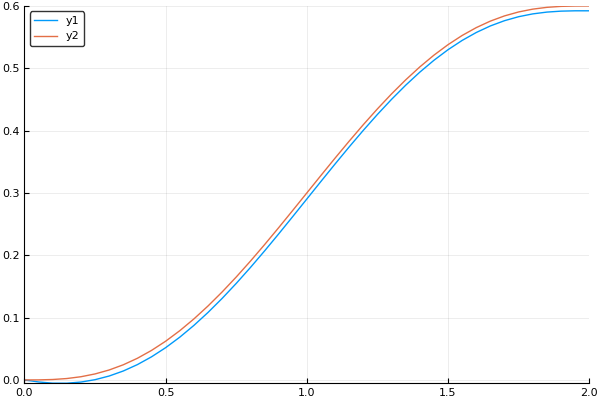

In [7]:
p1=plot(t_pid,x_pid[1])
p1 = plot!(t_pid,xout)
plot(p1)